# Experiment 3: Hyperparameter tuning impacts on Energy vs. Performance

Conditions: 
{BayesOpt, GridSearch} X {RandForest, XGBoost} X {BinClass, MultiClass, Regression}

Main Dependent vars:
Energy, Power, F1

Others: Power, Accuracy, MeanSquaredError, Precision, Recall, Runtime,

In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme("notebook")

sns.__version__

'0.11.2'

In [14]:
# load data
DATASETS = ['bank', 'maternal', 'winequality']
RF_RESULTS_PATHS = [ 'tuning_runs/combined_results_rf_' + f + '.csv' for f in DATASETS ]

XGB_RESULTS_PATHS = [ 'tuning_runs/combined_results_xgb_' + f + '.csv' for f in DATASETS ]

rf_results = pd.DataFrame()
for i, f in enumerate(RF_RESULTS_PATHS):
    r = pd.read_csv(f, index_col=0)
    r['dataset'] = DATASETS[i]
    r['model'] = 'rf'
    rf_results = pd.concat([rf_results, r])

xgb_results = pd.DataFrame()
for i, f in enumerate(XGB_RESULTS_PATHS):
    r = pd.read_csv(f, index_col=0)
    r['dataset'] = DATASETS[i]
    r['model'] = 'xgb'
    xgb_results = pd.concat([xgb_results, r])

results = pd.concat([rf_results, xgb_results])

In [30]:

y = results.apply(lambda r: r['F1'] if 'f1' in r.Target else r['MSE'], axis=1)
results['y'] = y
results

,Tuner,Max Depth,Max Features,N Estimators,Accuracy,Precision,Recall,F1,Micro F1,Target,Energy (J),Runtime (ms),Power (W),dataset,model,MSE,MAE,Colsample By Tree,y
0,grid,5,0.200000,150,0.848451,0.683525,0.816415,0.717880,0.848451,f1,492.35,1.652625e+10,2.979199e-11,bank,rf,NaN,NaN,NaN,0.717880
1,bayes,5,0.200715,52,0.841814,0.672294,0.794766,0.703863,0.841814,f1,1249.46,2.729963e+10,4.576839e-11,bank,rf,NaN,NaN,NaN,0.703863
0,grid,5,0.200000,100,0.660099,0.642365,0.720545,0.656856,0.660099,f1_macro,279.98,1.290024e+10,2.170347e-11,maternal,rf,NaN,NaN,NaN,0.656856
1,bayes,5,0.200000,150,0.655172,0.637606,0.717835,0.651920,0.655172,f1_macro,1026.84,2.426913e+10,4.231054e-11,maternal,rf,NaN,NaN,NaN,0.651920
0,grid,5,0.500000,50,NaN,NaN,NaN,NaN,NaN,MSE,285.75,1.154594e+10,2.474896e-11,winequality,rf,0.407408,0.510033,NaN,0.407408
1,bayes,5,0.477796,50,NaN,NaN,NaN,NaN,NaN,MSE,2507.20,5.016350e+10,4.998056e-11,winequality,rf,0.407408,0.510033,NaN,0.407408
0,grid,3,NaN,100,0.898230,0.736855,0.647136,0.677283,0.898230,f1,340.08,6.463556e+09,5.261500e-11,bank,xgb,NaN,NaN,0.800000,0.677283
1,bayes,3,NaN,83,0.897124,0.732133,0.646516,0.675657,0.897124,f1,961.73,1.773123e+10,5.423934e-11,bank,xgb,NaN,NaN,0.365836,0.675657
0,grid,5,NaN,100,0.812808,0.773141,0.793504,0.782412,0.812808,f1_macro,264.20,6.417575e+09,4.116820e-11,maternal,xgb,NaN,NaN,0.500000,0.782412
1,bayes,5,NaN,150,0.817734,0.778460,0.796214,0.786434,0.817734,f1_macro,963.33,1.911529e+10,5.039579e-11,maternal,xgb,NaN,NaN,0.622470,0.786434


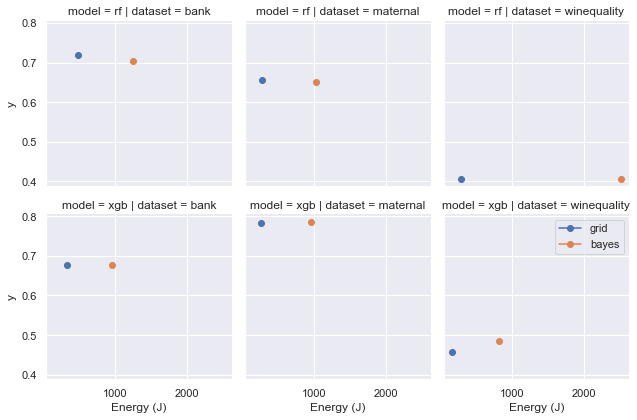

In [33]:
# plot pareto for energy vs. f1 performance
grid = sns.FacetGrid(results, row="model", col="dataset", hue="Tuner")

grid.map(plt.plot, 'Energy (J)', 'y', marker="o", type='bar')
plt.legend()

looks like since tuning results are comparable, this isn't really a good way to visualize it.

Getting just energy results

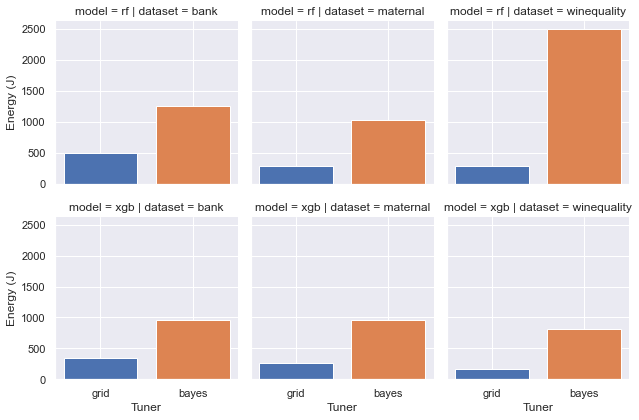

In [39]:
grid = sns.FacetGrid(results, row="model", col="dataset", hue="Tuner")  # hue for salience
grid.map(plt.bar, 'Tuner', 'Energy (J)')
plt.savefig('tuning_energy.pdf')

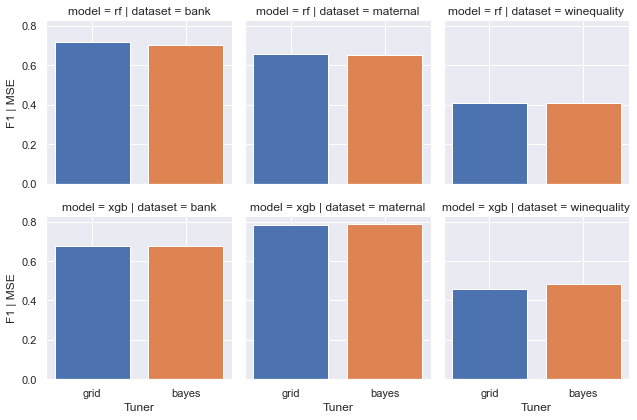

In [41]:
grid = sns.FacetGrid(results, row="model", col="dataset", hue="Tuner")  # hue for salience
grid.map(plt.bar, 'Tuner', 'y')
grid.set(ylabel='F1 | MSE')
plt.savefig('tuning_performance.pdf')

In [ ]:
# TODO: perhaps plot all bars on the same axes, with different y ticks for 
#       Energy and classification performance measure?
toplot = pd.melt(id_vars=['Tuner', 'model', 'dataset'], )
grid = sns.catplot(results, row="model", col="dataset", x="Tuner", y="Energy (J)", hue="")